# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [189]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Q1.1
airbnb_data = pd.read_csv("data/airbnb_NYC.csv", encoding = "cp1252")
display(airbnb_data.head())

# The values in [Price] is classified as string and contains comma.
print(type(airbnb_data["Price"].iloc[0]))
print(airbnb_data.loc[airbnb_data["Price"].str.contains(",", na=False), "Price"].head(10))

# Therefore we have to remove the comma and convert the data into numeric value.
airbnb_data["Price_clean"] = (airbnb_data["Price"].astype("string").str.replace(",", "", regex=False))
airbnb_data["Price_clean"] = pd.to_numeric(airbnb_data["Price_clean"])

# Count missing values after cleaning.
display(airbnb_data.head())
missing_price = airbnb_data["Price_clean"].isna().sum()
missing_price


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


<class 'str'>
101     1,990
263     1,000
764     1,200
1272    1,000
1275    5,000
1476    3,000
1846    1,500
1973    1,200
1977    1,800
2095    1,300
Name: Price, dtype: object


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating,Price_clean
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN,145
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN,37
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN,28
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN,199
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0,549


np.int64(0)

In [190]:
# Q1.2
mn_data = pd.read_csv("data/mn_police_use_of_force.csv")

# Inspecting data
mn_data["subject_injury"].value_counts(dropna=False)

# Count the missing proportion 
missing_prop = mn_data["subject_injury"].isna().mean()
print(missing_prop)

# Cross-tabulate your cleaned subject_injury
display(pd.crosstab(mn_data["force_type"], mn_data["subject_injury"], dropna=False))

# Filling the missing values
mn_data["subject_injury_clean"] = mn_data["subject_injury"].fillna("Missing")

mn_data

0.7619342359767892


subject_injury,No,Yes,NaN
force_type,,,
Baton,0,2,2
Bodily Force,1093,1286,7051
Chemical Irritant,131,41,1421
Firearm,2,0,0
Gun Point Display,33,44,27
Improvised Weapon,34,40,74
Less Lethal,0,0,87
Less Lethal Projectile,1,2,0
Maximal Restraint Technique,0,0,170


,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood,subject_injury_clean
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East,Missing
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West,Missing
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West,Missing
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West,Missing
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West,Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12920,2021/08/30 21:38:46,Assault in Progress,Yes,ASLT5,NaN,Bodily Force,Joint Lock,White,Female,69.0,NaN,1,Loring Park,Missing
12921,2021/08/30 22:32:22,Unwanted Person,Yes,CIC,NaN,Bodily Force,Joint Lock,NaN,NaN,NaN,NaN,1,Cedar Riverside,Missing
12922,2021/08/31 12:03:08,Overdose w/All,Yes,FORCE,NaN,Bodily Force,Body Weight Pin,Black,Male,NaN,NaN,3,Seward,Missing
12923,2021/08/31 12:52:52,Attempt Pick-Up,No,WT,NaN,Bodily Force,Body Weight Pin,Black,Male,31.0,NaN,4,Camden Industrial,Missing


In [191]:
# Q1.3
metabric_data = pd.read_csv("data/metabric.csv")
display(metabric_data.head())

# Adding the dummy values
metabric_data["survival_dummy"] = (metabric_data["Overall Survival Status"].str.contains("LIVING").astype(int))
display(metabric_data.head())

,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Chemotherapy,Hormone Therapy,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,Radio Therapy,TMB (nonsynonymous),Tumor Size,Tumor Stage
0,43.19,BREAST CONSERVING,Breast Cancer,NO,YES,0.0,2.0,4.020,84.633333,0:LIVING,YES,2.615035,10.0,1.0
1,48.87,MASTECTOMY,Breast Cancer,YES,YES,1.0,2.0,4.030,163.700000,1:DECEASED,NO,2.615035,15.0,2.0
2,47.68,MASTECTOMY,Breast Cancer,YES,YES,3.0,1.0,4.050,164.933333,0:LIVING,YES,1.307518,25.0,2.0
3,76.97,MASTECTOMY,Breast Cancer,YES,YES,8.0,2.0,6.080,41.366667,1:DECEASED,YES,2.615035,40.0,2.0
4,78.77,MASTECTOMY,Breast Cancer,NO,YES,0.0,4.0,4.062,7.800000,1:DECEASED,YES,5.230071,31.0,4.0


,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Chemotherapy,Hormone Therapy,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,Radio Therapy,TMB (nonsynonymous),Tumor Size,Tumor Stage,survival_dummy
0,43.19,BREAST CONSERVING,Breast Cancer,NO,YES,0.0,2.0,4.020,84.633333,0:LIVING,YES,2.615035,10.0,1.0,1
1,48.87,MASTECTOMY,Breast Cancer,YES,YES,1.0,2.0,4.030,163.700000,1:DECEASED,NO,2.615035,15.0,2.0,0
2,47.68,MASTECTOMY,Breast Cancer,YES,YES,3.0,1.0,4.050,164.933333,0:LIVING,YES,1.307518,25.0,2.0,1
3,76.97,MASTECTOMY,Breast Cancer,YES,YES,8.0,2.0,6.080,41.366667,1:DECEASED,YES,2.615035,40.0,2.0,0
4,78.77,MASTECTOMY,Breast Cancer,NO,YES,0.0,4.0,4.062,7.800000,1:DECEASED,YES,5.230071,31.0,4.0,0


In [192]:
# Q1.4 
missing_reviews = airbnb_data["Review Scores Rating"].isna().sum()
print(missing_reviews)
print(airbnb_data.shape[0])

# Inpute the median of existing results
median_score = airbnb_data["Review Scores Rating"].median()

airbnb_data["Review Scores Rating Imputed"] = (airbnb_data["Review Scores Rating"].fillna(median_score))

airbnb_data.head(10)


8323
30478


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating,Price_clean,Review Scores Rating Imputed
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN,145,94.0
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN,37,94.0
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN,28,94.0
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN,199,94.0
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0,549,96.0
5,1039,7/25/2008,Big Greenpoint 1BD w/ Skyline View,Brooklyn,Apartment,100.0,Entire home/apt,11222.0,1.0,1,4,149,100.0,149,100.0
6,1783,8/12/2008,Amazing Also,Manhattan,Apartment,100.0,Entire home/apt,10004.0,1.0,1,9,250,100.0,250,100.0
7,2078,8/15/2008,"Colorful, quiet, & near the subway!",Brooklyn,Apartment,90.0,Private room,11201.0,1.0,1,80,90,94.0,90,94.0
8,2339,8/20/2008,East Village Cocoon: 2 Bedroom Flat,Manhattan,Apartment,90.0,Entire home/apt,10009.0,2.0,1,95,270,90.0,270,90.0
9,2339,8/20/2008,Lovely 2 Bedroom East Village Nest,Manhattan,Apartment,95.0,Entire home/apt,10009.0,2.0,1,23,290,96.0,290,96.0


Around 27.3% of review are missing in this dataset, and the question asked to created a new column using median rating among non-missing listings, which cannot accurately represent the review due to amount of missing data and attribute of static usage of median. For such practice will misguide new clients.


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

In [193]:
# Q2.1
shark = pd.read_excel("data/shark_attack.xls", engine="xlrd")
display(shark.head())

# Q2.2
shark = shark.dropna(axis=1, how="all")
display(shark.head())
print(shark.isna().all().sum())


,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,29th January,2026.0,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13,...,Unknown bull and tiger sharks frequent the area,Kevin McMurray Trackingsharks.com: TV Globo: P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29th January,2026.0,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,?,...,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24th January,2026.0,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,?,...,1.7m Seven Gill shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,29th January,2026.0,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13,...,Unknown bull and tiger sharks frequent the area,Kevin McMurray Trackingsharks.com: TV Globo: P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29th January,2026.0,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,?,...,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24th January,2026.0,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,?,...,1.7m Seven Gill shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


0


Q 2.3
Each observation represents one recorded shark incident report (shark attack ), a single event/case entry describing an interaction between a shark and a person (or reported incident), with attributes like year/date, location, activity, victim age/sex, whether it was provoked, and whether it was fatal.

count    7071.000000
mean     1935.991515
std       270.689040
min         0.000000
25%      1948.000000
50%      1987.000000
75%      2010.000000
max      2026.000000
Name: Year_clean, dtype: float64

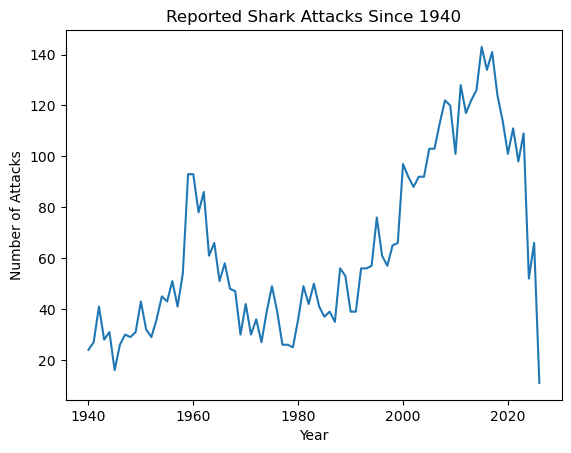

In [194]:
#Q 2.4
shark["Year_clean"] = pd.to_numeric(shark["Year"])
display(shark["Year_clean"].describe())

# Group the events
shark_1940 = shark[shark["Year_clean"] >= 1940]
attacks_per_year = shark_1940.groupby("Year_clean").size()

# Plot
attacks_per_year.plot()
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.title("Reported Shark Attacks Since 1940")
plt.show()

The range of the dataset's Year is 2026 that the minimum value is 0 and maximum is 2026.
The plot shows an upward of attacks from 1940 to 1960 and from 1980 to 2020, and significant declines in years 1960 and 2018. Overall the plot shows a increasing trend until 2019 that the shark attacks of that year is equal to that of 1940.

<class 'str'>


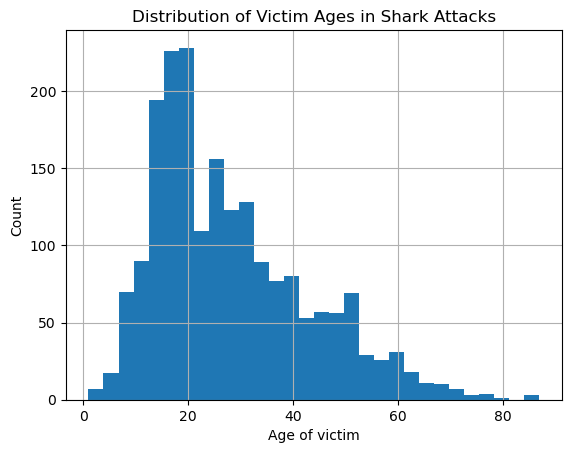

In [195]:
# Q2.5
print(type(shark["Age"].iloc[0]))
shark["Age_clean"] = (shark["Age"].replace("?", pd.NA).str.extract(r"(\d+)", expand=False))
shark["Age_clean"] = pd.to_numeric(shark["Age_clean"])

# Plotting
shark["Age_clean"].hist(bins=30)
plt.xlabel("Age of victim")
plt.ylabel("Count")
plt.title("Distribution of Victim Ages in Shark Attacks")
plt.show()

In [196]:
# Q2.6
shark["Type_clean"] = shark["Type"].where(shark["Type"].isin(["Provoked", "Unprovoked"]), "Unknown")

# Calculate the porportion
prop_unprovoked = shark["Type_clean"].value_counts(normalize=True).get("Unprovoked", 0)
print(prop_unprovoked)

0.7385833451152269


In [197]:
# Q2.7
shark["Fatal_clean"] = shark["Fatal Y/N"].where(shark["Fatal Y/N"].isin(["Y", "N"]), "Unknown")

shark["Fatal_clean"].value_counts()

Fatal_clean
N          4932
Y          1488
Unknown     653
Name: count, dtype: int64

In [198]:
# Q2.8
pd.crosstab(
    shark["Type_clean"],
    shark["Fatal_clean"],
    normalize="index"
)


Fatal_clean,N,Unknown,Y
Type_clean,,,
Provoked,0.950156,0.018692,0.031153
Unknown,0.373654,0.459818,0.166529
Unprovoked,0.741003,0.016462,0.242534


In [199]:
shark_new = shark[
    shark["Type_clean"].isin(["Provoked", "Unprovoked"]) &
    shark["Fatal_clean"].isin(["Y", "N"])
]
pd.crosstab(
    shark_new["Type_clean"],
    shark_new["Fatal_clean"],
    normalize="index"
)

Fatal_clean,N,Y
Type_clean,,
Provoked,0.968254,0.031746
Unprovoked,0.753406,0.246594


The unprovoked results more death than provoked. People tend to provoke reasonable target. For example, a sane man will not provoke a bear but a dog, or cat. And Unprovoked attack is more dangerous, for people usually not aware of it.

**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

Q3.1 This paper is about the importance and benefit of organizing data in tidy structure.

Q3.2 The tidy data standard intended to an universal way for data to be organized under consideration that different datasets are structure differently and might causes inconvenience and misunderstanding

Q3.3 The first sentence means that the tidy dataset is well organized in its structure and its meaning that two tidy datasets are identity in their way of representing data. The second sentence means that is generally easier to interpret the relationship between variables (column) than rows.

Q3.4 Wickham defines value as either numbers or strings that belongs to a variable (column) and a observation (row). A variable contains all values that measure the same underlying attribute of example height, weight, or speed. Last, the observation contains all values measured on the same unit, of outcome or each trial of experiment

Q3.5 The tidy data structure is defined as each variable forms a column, each observation forms a row, and each type of observational unit forms a table.

Q3.6 5 most common problems with messy data:
1) Column headers are values, not variable names.
2) Multiple variables are stored in one column.
3) Variable are stored in both rows and columns.
4) Multiple types of observational units are stored in the same table.
5) A single observational unit is stored in multiple tables

The table 4 is messing because it puts income bracket as the header when it is a variable, and this action forces the counts to be stored in grid instead of presenting as many observations. The melting dataset means that we have to stack it, which is to turn columns into rows

Q3.7 Table 11 is messy because it treats each possible dates as variables. And table 12 treats it has date which stack the variable into one column.

**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? 

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 
6. Which giftors provide the most money, in total? 

In [200]:
# Q4.1
gifts = pd.read_csv("data/ForeignGifts_edu.csv")
display(gifts.head())
print(gifts.shape)

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


(28221, 10)


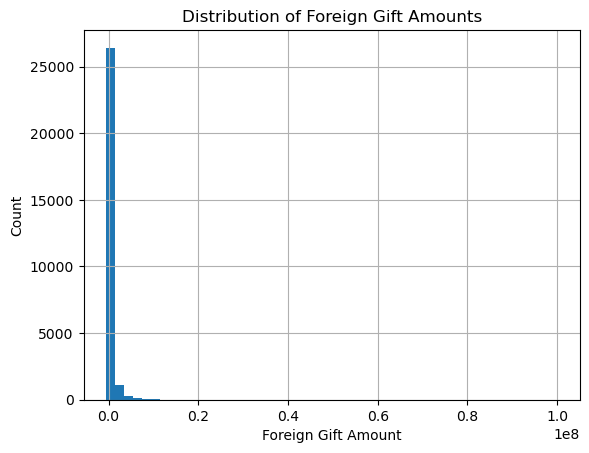

In [201]:
# Q4.2
gifts["Foreign Gift Amount"].dropna().hist(bins=50)
plt.xlabel("Foreign Gift Amount")
plt.ylabel("Count")
plt.title("Distribution of Foreign Gift Amounts")
plt.show()

Q4.2 the majority of the gifts amounts are really small.

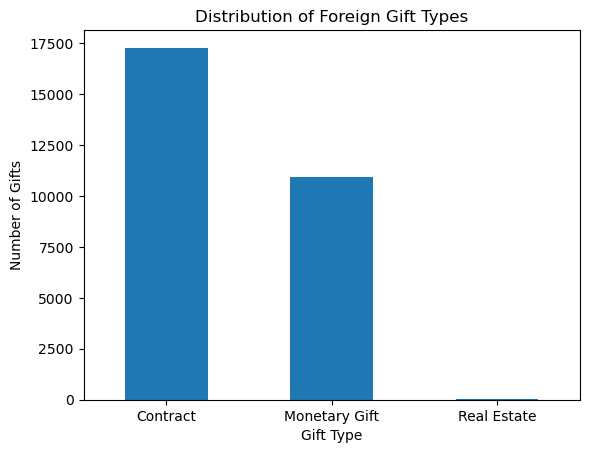

In [202]:
# Q4.3
gifts["Gift Type"].value_counts().plot(kind="bar")
plt.xlabel("Gift Type")
plt.xticks(rotation=0)
plt.ylabel("Number of Gifts")
plt.title("Distribution of Foreign Gift Types")
plt.show()


In [203]:
# Q4.4 a)
top15_countries_count = (gifts.groupby("Country of Giftor").size().sort_values(ascending=False).head(15))
print(top15_countries_count)

# b)
top15_countries_amount = (gifts.groupby("Country of Giftor")["Foreign Gift Amount"].sum().sort_values(ascending=False).head(15))
print(top15_countries_amount)


Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
dtype: int64
Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA                248409202
Name: Foreign Gift Amount, dtype: int64


Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int64


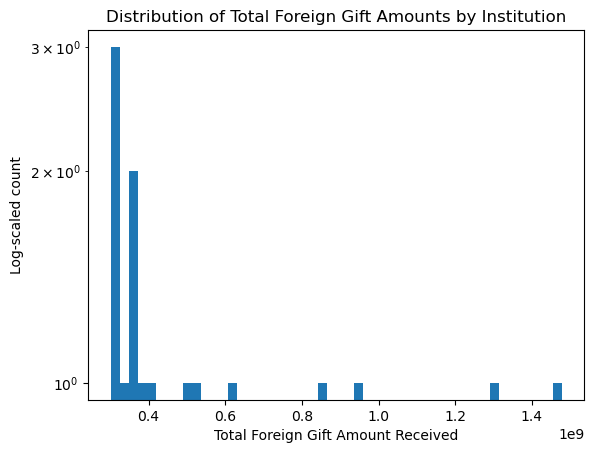

In [204]:
# Q4.5
institutions = (gifts.groupby("Institution Name")["Foreign Gift Amount"].sum().sort_values(ascending=False).head(15))
print(institutions)

plt.hist(institutions, bins=50, log=True)
plt.xlabel("Total Foreign Gift Amount Received")
plt.ylabel("Log-scaled count")
plt.title("Distribution of Total Foreign Gift Amounts by Institution")
plt.show()

In [205]:
# Q4.6
top_giftors = (gifts.groupby("Giftor Name")["Foreign Gift Amount"].sum().sort_values(ascending=False).head(1))
top_giftors


Giftor Name
Qatar Foundation    1166503744
Name: Foreign Gift Amount, dtype: int64

**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

In [206]:
college = pd.read_csv("data/college_completion.csv")

# Q5.2
display(college.head())
print(college.shape)

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


(3798, 63)


There are 3798 observation and 63 variables.

In [207]:
# Q5.3
pd.crosstab(
    college["control"],
    college["level"],
    normalize="index"
)

level,2-year,4-year
control,,
Private for-profit,0.468750,0.531250
Private not-for-profit,0.054487,0.945513
Public,0.594352,0.405648


The Private-not-for-profit schools are almost all 4-year in level. Private for-profit schools are quite evenly distribute between 2-year and 4-year in level. Last, the public schools lain towards 2-year level.

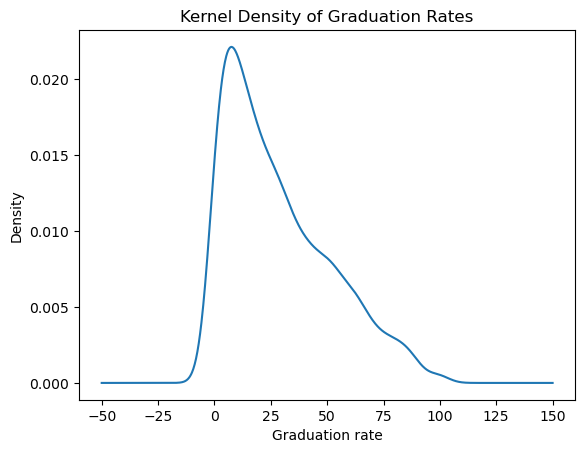

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64

In [208]:
# Q5.4
college["grad_100_value"].dropna().plot(kind="density")
plt.xlabel("Graduation rate")
plt.title("Kernel Density of Graduation Rates")
plt.show()

college["grad_100_value"].describe()

The graduation rate is really low with mean of 28.36 percent which means only less than 1/3 of people will graduate on expected time.

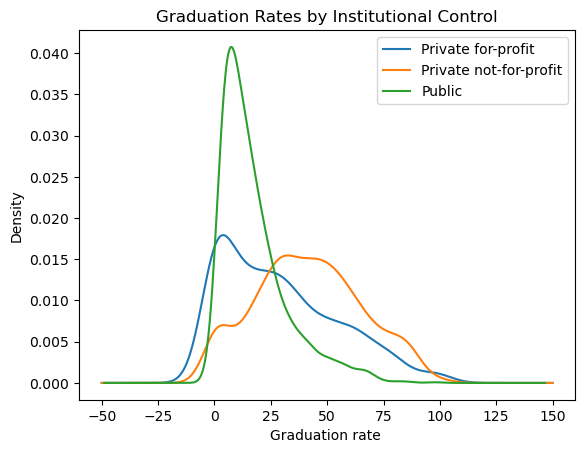

,count,mean,std,min,25%,50%,75%,max
control,,,,,,,,
Private for-profit,779.0,29.108858,25.601687,0.0,6.95,24.7,46.75,100.0
Private not-for-profit,1189.0,41.660976,23.551231,0.0,25.00,41.0,58.30,100.0
Public,1499.0,17.430887,14.729443,0.0,6.90,13.2,23.25,97.8


In [209]:
for c, df_c in college.groupby("control"):
    df_c["grad_100_value"].dropna().plot(kind="density", label=c)

plt.xlabel("Graduation rate ")
plt.title("Graduation Rates by Institutional Control")
plt.legend()
plt.show()

college.groupby("control")["grad_100_value"].describe()

The private not-for-profit schools have the most favorable arc (41.66%) of graduation on expected time.

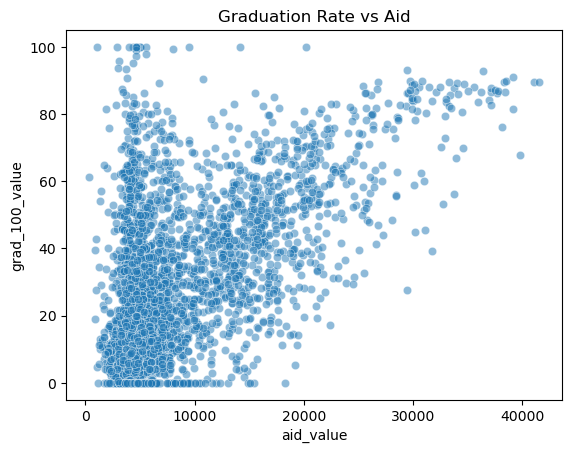

(np.float64(88610.48316902411), np.float64(0.5758792845936064))

In [210]:
# 5.5
sns.scatterplot(
    data=college,
    x="aid_value",
    y="grad_100_value",
    alpha=0.5
)

plt.title("Graduation Rate vs Aid")
plt.show()

cov_all = college[["aid_value", "grad_100_value"]].cov().iloc[0, 1]
corr_all = college[["aid_value", "grad_100_value"]].corr().iloc[0, 1]

cov_all, corr_all


The scatterplot shows a positive association, and supported by its covariance of approximately 88,610 and a correlation of about 0.58, which indicates a moderate positive relationship between aid levels and graduation rates across institutions.

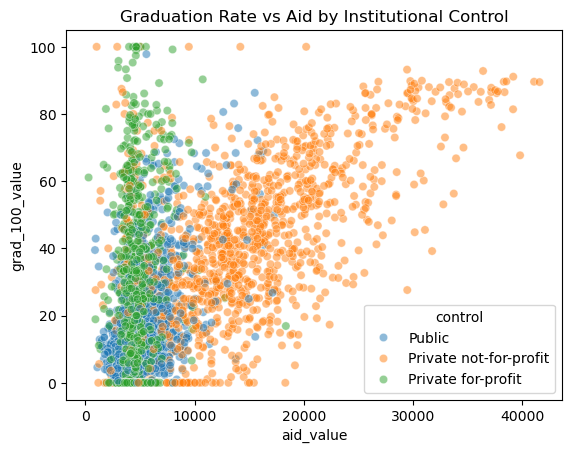

In [211]:
sns.scatterplot(
    data=college,
    x="aid_value",
    y="grad_100_value",
    hue="control",
    alpha=0.5
)

plt.title("Graduation Rate vs Aid by Institutional Control")
plt.show()

The private for-profit schools don't offer much aid in supporting students, and public schools sort of (slightly) offer more aid in compared with private for-profit. However, the Private not-for-profit schools offer much more aid in supporting students and the aid vary positively with the graduation on the expected time.

**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$. 

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

The solution to this question is in the repo

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?

In [212]:
# Q7.1
ames = pd.read_csv("data/ames_prices.csv")
display(ames.head())
print(ames.shape)
print(ames.columns)

,Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,1,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,2,526350040,896,105000,20,RH,80.0,11622,Pave,NaN,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,3,526351010,1329,172000,20,RL,81.0,14267,Pave,NaN,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
3,4,526353030,2110,244000,20,RL,93.0,11160,Pave,NaN,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
4,5,527105010,1629,189900,60,RL,74.0,13830,Pave,NaN,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


(2930, 82)
Index(['Order', 'PID', 'area', 'price', 'MS.SubClass', 'MS.Zoning',
       'Lot.Frontage', 'Lot.Area', 'Street', 'Alley', 'Lot.Shape',
       'Land.Contour', 'Utilities', 'Lot.Config', 'Land.Slope', 'Neighborhood',
       'Condition.1', 'Condition.2', 'Bldg.Type', 'House.Style',
       'Overall.Qual', 'Overall.Cond', 'Year.Built', 'Year.Remod.Add',
       'Roof.Style', 'Roof.Matl', 'Exterior.1st', 'Exterior.2nd',
       'Mas.Vnr.Type', 'Mas.Vnr.Area', 'Exter.Qual', 'Exter.Cond',
       'Foundation', 'Bsmt.Qual', 'Bsmt.Cond', 'Bsmt.Exposure',
       'BsmtFin.Type.1', 'BsmtFin.SF.1', 'BsmtFin.Type.2', 'BsmtFin.SF.2',
       'Bsmt.Unf.SF', 'Total.Bsmt.SF', 'Heating', 'Heating.QC', 'Central.Air',
       'Electrical', 'X1st.Flr.SF', 'X2nd.Flr.SF', 'Low.Qual.Fin.SF',
       'Bsmt.Full.Bath', 'Bsmt.Half.Bath', 'Full.Bath', 'Half.Bath',
       'Bedroom.AbvGr', 'Kitchen.AbvGr', 'Kitchen.Qual', 'TotRms.AbvGrd',
       'Functional', 'Fireplaces', 'Fireplace.Qu', 'Garage.Type',
       '

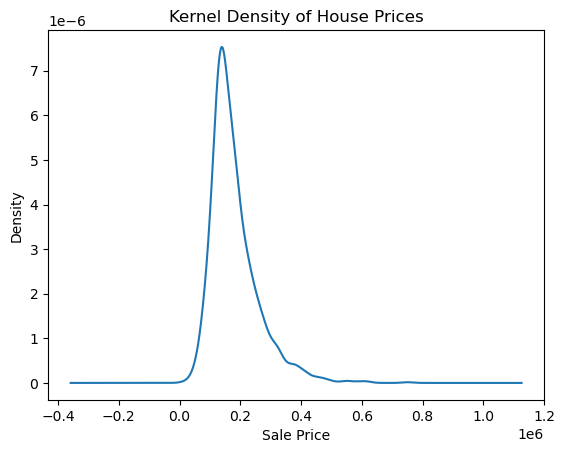

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: price, dtype: float64


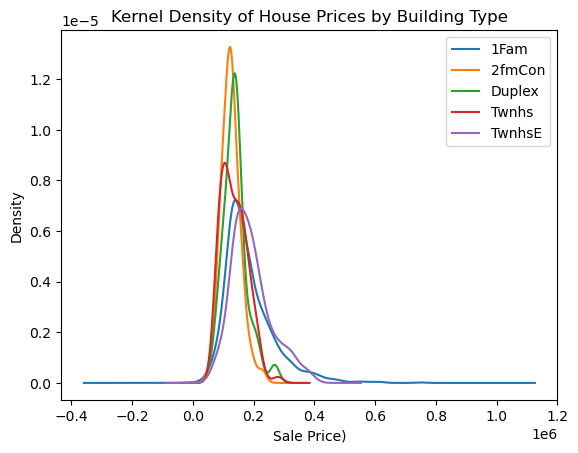

            count           mean           std      min       25%       50%  \
Bldg.Type                                                                     
1Fam       2425.0  184812.041237  82821.802329  12789.0  130000.0  165000.0   
2fmCon       62.0  125581.709677  31089.239840  55000.0  106562.5  122250.0   
Duplex      109.0  139808.935780  39498.973534  61500.0  118858.0  136905.0   
Twnhs       101.0  135934.059406  41938.931130  73000.0  100500.0  130000.0   
TwnhsE      233.0  192311.914163  66191.738021  71000.0  145000.0  180000.0   

                75%       max  
Bldg.Type                      
1Fam       220000.0  755000.0  
2fmCon     140000.0  228950.0  
Duplex     153337.0  269500.0  
Twnhs      170000.0  280750.0  
TwnhsE     222000.0  392500.0  


In [213]:
# Q7.2
ames["price"].plot(kind="density")
plt.xlabel("Sale Price")
plt.title("Kernel Density of House Prices")
plt.xscale("linear")
plt.show()

print(ames["price"].describe())

for btype, df_b in ames.groupby("Bldg.Type"):
    df_b["price"].dropna().plot(kind="density", label=btype)

plt.xlabel("Sale Price)")
plt.title("Kernel Density of House Prices by Building Type")
plt.xscale("linear")
plt.legend()
plt.show()

print(ames.groupby("Bldg.Type")["price"].describe())


Twnhs building type is the most expensive house on average hat is around $192312. 1Fam building type is the one with the highest variance that is 82821.8^2.

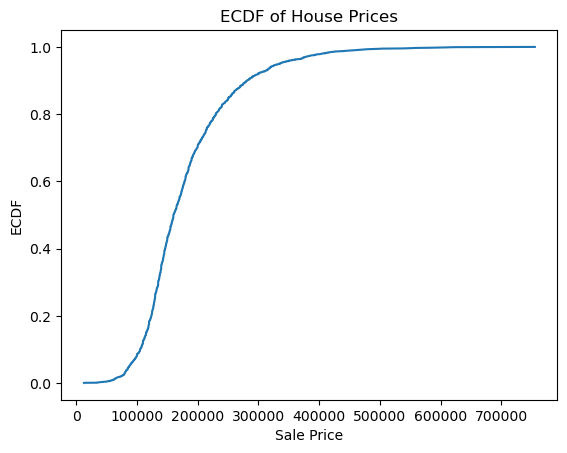

0.00     12789.0
0.25    129500.0
0.50    160000.0
0.75    213500.0
1.00    755000.0
Name: price, dtype: float64


In [214]:
# Q7.3
x = np.sort(ames["price"].dropna())
y = np.arange(1, len(x) + 1) / len(x)

plt.plot(x, y)
plt.xlabel("Sale Price")
plt.ylabel("ECDF")
plt.title("ECDF of House Prices")
plt.show()

summary = ames["price"].quantile([0, 0.25, 0.5, 0.75, 1])
print(summary)


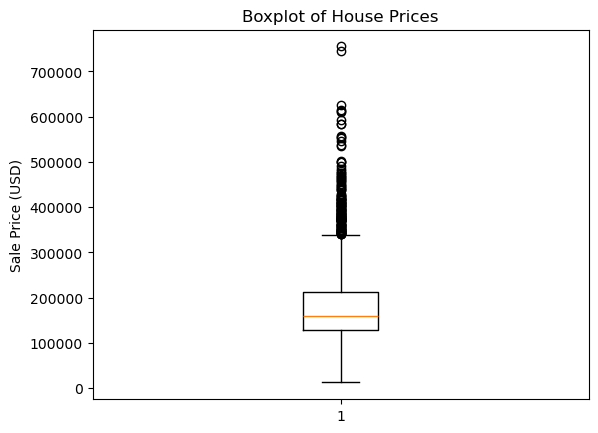

In [215]:
# Q7.4
plt.boxplot(ames["price"].dropna(), vert=True)
plt.ylabel("Sale Price (USD)")
plt.title("Boxplot of House Prices")
plt.show()

Yes, there are a lot of outliers.

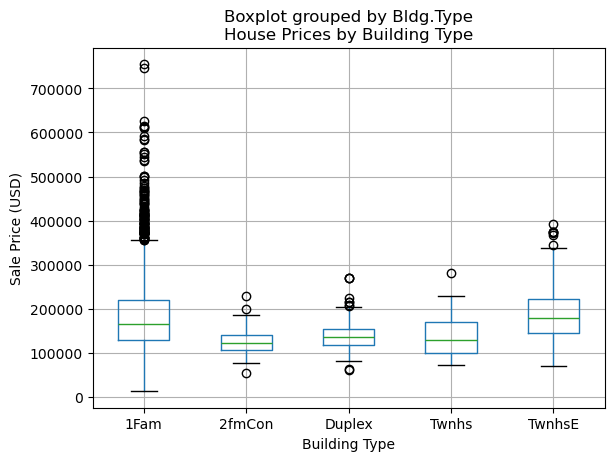

In [216]:
# Q7.5
ames.boxplot(
    column="price",
    by="Bldg.Type"
)

plt.xlabel("Building Type")
plt.ylabel("Sale Price (USD)")
plt.title("House Prices by Building Type")
plt.show()


The boxplot shows really similar representation of data as the density plot, but the boxplot tells us more information of the outliers  that 1Fam building type has the most outliers compared with other building types.

In [217]:
# Q7.6

# price beyond 2 percentiles or lower will be consider as outliers
lower = ames["price"].quantile(0.025)
upper = ames["price"].quantile(0.975)

ames["price outlier"] = ((ames["price"] < lower) | (ames["price"] > upper)).astype(int)

ames.head()

,Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,price outlier
0,1,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,0
1,2,526350040,896,105000,20,RH,80.0,11622,Pave,NaN,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,0
2,3,526351010,1329,172000,20,RL,81.0,14267,Pave,NaN,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,0
3,4,526353030,2110,244000,20,RL,93.0,11160,Pave,NaN,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,0
4,5,527105010,1629,189900,60,RL,74.0,13830,Pave,NaN,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,0


/var/folders/t6/fdg24_1x5970273s9fgndyg40000gn/T/ipykernel_29672/63959918.py:6: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ames["price_w"] = ames["price"].clip(lower=lower, upper=upper)


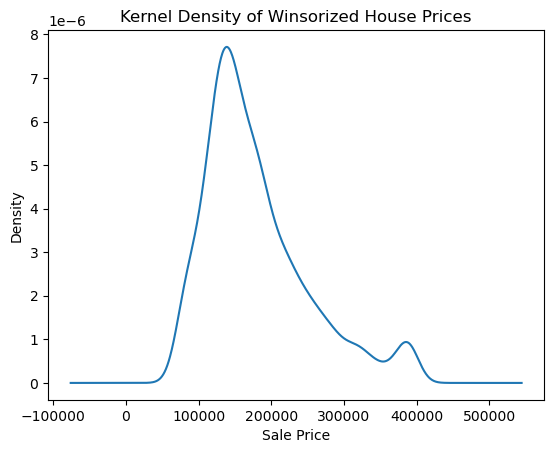

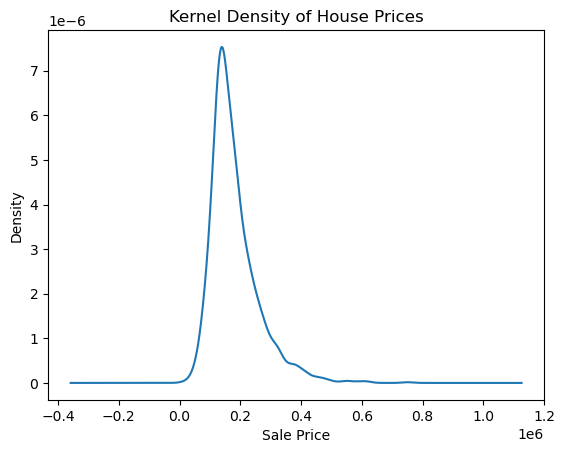

count      2930.000000
mean     179312.946416
std       71902.705021
min       79000.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      389325.000000
Name: price_w, dtype: float64
count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: price, dtype: float64


In [218]:
# Q7.7
lower = ames["price"].quantile(0.025)
upper = ames["price"].quantile(0.975)

# Winsorized
ames["price_w"] = ames["price"].clip(lower=lower, upper=upper)

ames["price_w"].plot(kind="density")
plt.xlabel("Sale Price")
plt.title("Kernel Density of Winsorized House Prices")
plt.show()


# Normal
ames["price"].plot(kind="density")
plt.xlabel("Sale Price")
plt.title("Kernel Density of House Prices")
plt.xscale("linear")
plt.show()

print(ames["price_w"].describe())
print(ames["price"].describe())

The winsorized graph is lesser extreme in compared with the normal density plot 